In [1]:
N_threads = 1
device = "cpu"

In [2]:
%load_ext autoreload

import sys, os
os.environ["OMP_NUM_THREADS"] = str(N_threads)
os.environ["OPENBLAS_NUM_THREADS"] = str(N_threads)
os.environ["MKL_NUM_THREADS"] = str(N_threads)
os.environ["VECLIB_MAXIMUM_THREADS"] = str(N_threads)
os.environ["NUMEXPR_NUM_THREADS"] = str(N_threads)

import numpy as np
import torch

import SBIBE as sbibe
import preprocessing_tools

%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')

if device == "cpu":
    torch.manual_seed(seed=0)
if device == "cuda":
    torch.cuda.manual_seed(seed=0)
    torch.cuda.manual_seed_all(seed=0)

2023-10-25 22:17:21.972909: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 22:17:21.972947: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 22:17:21.972968: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 22:17:21.982287: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 22:17:22.936572: W tensorflow/c

In [3]:
NN=10

# Train

In [4]:
path_save_data = "/dipc_storage/dlopez/Projects/sbibe/baccoemu_train/"

N_points = 3000
seed=0

dict_bounds=dict(
  omega_cold=[0.23, 0.4],
  omega_baryon=[0.04, 0.06],
  hubble=[0.6, 0.8],
  ns=[0.92, 1.01],
  sigma8_cold=[0.73, 0.9]
)

theta_train = preprocessing_tools.sample_latin_hypercube(dict_bounds, N_points=N_points, seed=seed)
preprocessing_tools.save_theta(path_save_data, theta_train)

xx_A1_train = preprocessing_tools.get_Pk_vary_baryon_param(theta_train, min_value=9, max_value=13, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelA1", xx_A1_train)

xx_A2_train = preprocessing_tools.get_Pk_vary_baryon_param(theta_train, min_value=14.6, max_value=15, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelA2", xx_A2_train)

xx_R_train = preprocessing_tools.get_Pk_vary_baryon_param(theta_train, min_value=13.5, max_value=14.3, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelR", xx_R_train)

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
print(theta_train.shape)
print(xx_A1_train.shape)
print(xx_A2_train.shape)
print(xx_R_train.shape)

print(np.min(theta_train, axis=0))
print(np.max(theta_train, axis=0))

(3000, 5)
(10, 3000, 100)
(10, 3000, 100)
(10, 3000, 100)
[0.23002118 0.04000665 0.60002221 0.92000219 0.73000117]
[0.39996258 0.05999337 0.79995336 1.00998295 0.89997752]


<IPython.core.display.Javascript object>


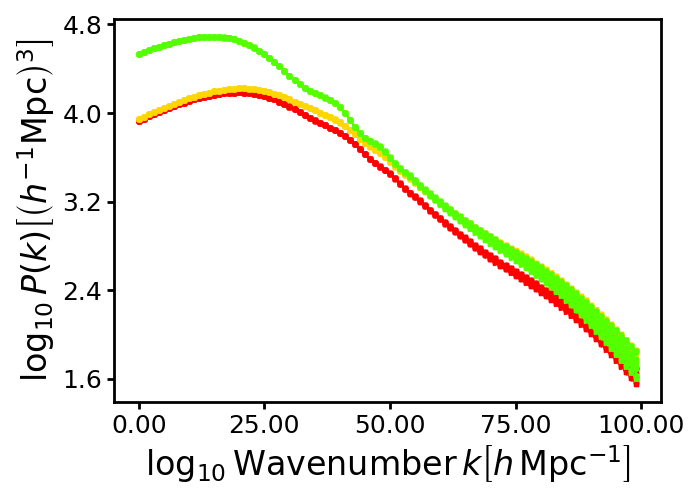

In [6]:
fig, ax = sbibe.plot_utils.simple_plot(
    x_label=r'$\log_{10}\mathrm{Wavenumber}\, k \left[ h\, \mathrm{Mpc}^{-1} \right]$',
    y_label=r'$\log_{10}P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right]$'
)

N_plot_cosmo = 3
indexes_cosmo = np.random.choice(theta_train.shape[0], N_plot_cosmo, replace=False)

colors = sbibe.plot_utils.get_N_colors(N_plot_cosmo, mpl.colormaps['prism'])
markers = sbibe.plot_utils.get_N_markers(xx_A1_train.shape[0])
for ii_cosmo, index_cosmo in enumerate(indexes_cosmo):
    for ii_aug in range(xx_A1_train.shape[0]):
        ax.plot(xx_A1_train[ii_aug, index_cosmo], c=colors[ii_cosmo], ls='--', lw=1, marker=markers[ii_aug], ms=3)
        ax.plot(xx_A2_train[ii_aug, index_cosmo], c=colors[ii_cosmo], ls=':', lw=1, marker=markers[ii_aug], ms=3)
        ax.plot(xx_R_train[ii_aug, index_cosmo], c=colors[ii_cosmo], ls='-', lw=1, marker=markers[ii_aug], ms=3)
        
plt.tight_layout()
plt.show()

# Val

In [7]:
path_save_data = "/dipc_storage/dlopez/Projects/sbibe/baccoemu_val/"

N_points = 987
seed=0

dict_bounds=dict(
  omega_cold=[0.25, 0.38],
  omega_baryon=[0.042, 0.058],
  hubble=[0.62, 0.78],
  ns=[0.93, 1.00],
  sigma8_cold=[0.75, 0.88]
)

theta_val = preprocessing_tools.sample_latin_hypercube(dict_bounds, N_points=N_points, seed=seed)
preprocessing_tools.save_theta(path_save_data, theta_val)

xx_A1_val = preprocessing_tools.get_Pk_vary_baryon_param(theta_val, min_value=9, max_value=13, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelA1", xx_A1_val)

xx_A2_val = preprocessing_tools.get_Pk_vary_baryon_param(theta_val, min_value=14.6, max_value=15, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelA2", xx_A2_val)

xx_R_val = preprocessing_tools.get_Pk_vary_baryon_param(theta_val, min_value=13.5, max_value=14.3, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelR", xx_R_val)

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
print(theta_val.shape)
print(xx_A1_val.shape)
print(xx_A2_val.shape)
print(xx_R_val.shape)

print(np.min(theta_val, axis=0))
print(np.max(theta_val, axis=0))

(987, 5)
(10, 987, 100)
(10, 987, 100)
(10, 987, 100)
[0.25001676 0.04200548 0.62001517 0.93005354 0.75010432]
[0.37996621 0.05799788 0.77986663 0.99999974 0.87989259]


<IPython.core.display.Javascript object>


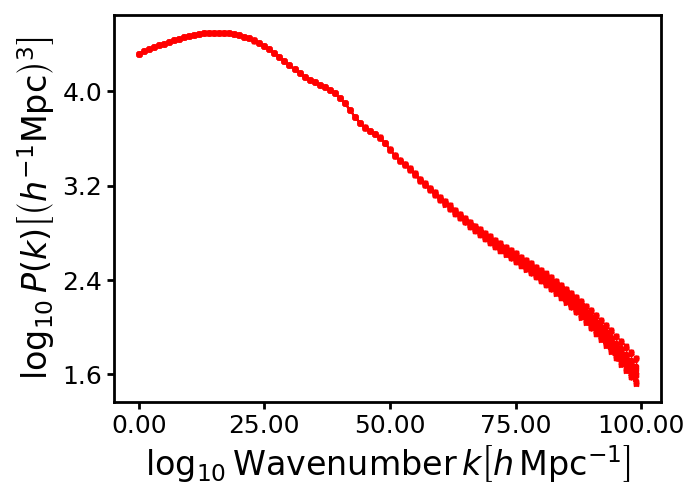

In [9]:
fig, ax = sbibe.plot_utils.simple_plot(
    x_label=r'$\log_{10}\mathrm{Wavenumber}\, k \left[ h\, \mathrm{Mpc}^{-1} \right]$',
    y_label=r'$\log_{10}P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right]$'
)

N_plot_cosmo = 1
indexes_cosmo = np.random.choice(theta_val.shape[0], N_plot_cosmo, replace=False)

colors = sbibe.plot_utils.get_N_colors(N_plot_cosmo, mpl.colormaps['prism'])
markers = sbibe.plot_utils.get_N_markers(xx_A1_val.shape[0])
for ii_cosmo, index_cosmo in enumerate(indexes_cosmo):
    for ii_aug in range(xx_A1_val.shape[0]):
        ax.plot(xx_A1_val[ii_aug, index_cosmo], c=colors[ii_cosmo], ls='--', lw=1, marker=markers[ii_aug], ms=3)
        ax.plot(xx_A2_val[ii_aug, index_cosmo], c=colors[ii_cosmo], ls=':', lw=1, marker=markers[ii_aug], ms=3)
        ax.plot(xx_R_val[ii_aug, index_cosmo], c=colors[ii_cosmo], ls='-', lw=1, marker=markers[ii_aug], ms=3)
        
plt.tight_layout()
plt.show()

# test

In [10]:
path_save_data = "/dipc_storage/dlopez/Projects/sbibe/baccoemu_test/"

N_points = 987
seed=137

dict_bounds=dict(
  omega_cold=[0.25, 0.38],
  omega_baryon=[0.042, 0.058],
  hubble=[0.62, 0.78],
  ns=[0.93, 1.00],
  sigma8_cold=[0.75, 0.88]
)

theta_test = preprocessing_tools.sample_latin_hypercube(dict_bounds, N_points=N_points, seed=seed)
preprocessing_tools.save_theta(path_save_data, theta_test)

xx_A1_test = preprocessing_tools.get_Pk_vary_baryon_param(theta_test, min_value=9, max_value=13, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelA1", xx_A1_test)

xx_A2_test = preprocessing_tools.get_Pk_vary_baryon_param(theta_test, min_value=14.6, max_value=15, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelA2", xx_A2_test)

xx_R_test = preprocessing_tools.get_Pk_vary_baryon_param(theta_test, min_value=13.5, max_value=14.3, NN=NN, baryon_key='M_c')
preprocessing_tools.save_model(path_save_data, "modelR", xx_R_test)

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklear

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packa

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_SBIBE/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.


In [11]:
print(theta_test.shape)
print(xx_A1_test.shape)
print(xx_A2_test.shape)
print(xx_R_test.shape)

print(np.min(theta_test, axis=0))
print(np.max(theta_test, axis=0))

(987, 5)
(10, 987, 100)
(10, 987, 100)
(10, 987, 100)
[0.25010252 0.04201061 0.62008988 0.93001566 0.75005136]
[0.37996078 0.05799894 0.77989495 0.99997993 0.87987059]


<IPython.core.display.Javascript object>


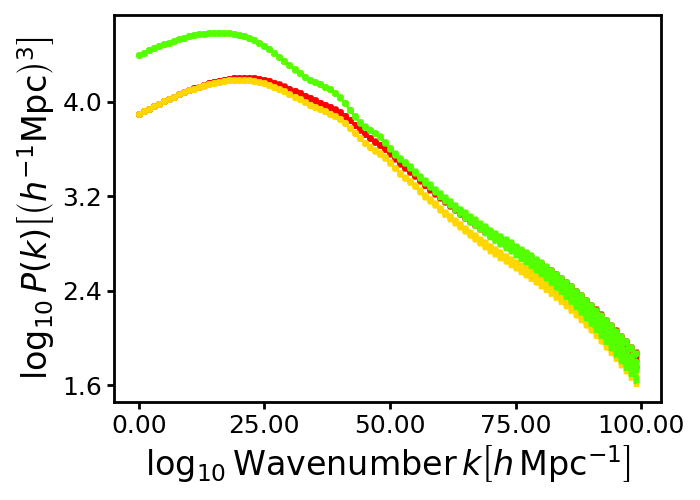

In [12]:
fig, ax = sbibe.plot_utils.simple_plot(
    x_label=r'$\log_{10}\mathrm{Wavenumber}\, k \left[ h\, \mathrm{Mpc}^{-1} \right]$',
    y_label=r'$\log_{10}P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right]$'
)

N_plot_cosmo = 3
indexes_cosmo = np.random.choice(theta_test.shape[0], N_plot_cosmo, replace=False)

colors = sbibe.plot_utils.get_N_colors(N_plot_cosmo, mpl.colormaps['prism'])
markers = sbibe.plot_utils.get_N_markers(xx_A1_test.shape[0])
for ii_cosmo, index_cosmo in enumerate(indexes_cosmo):
    for ii_aug in range(xx_A1_test.shape[0]):
        ax.plot(xx_A1_test[ii_aug, index_cosmo], c=colors[ii_cosmo], ls='--', lw=1, marker=markers[ii_aug], ms=3)
        ax.plot(xx_A2_test[ii_aug, index_cosmo], c=colors[ii_cosmo], ls=':', lw=1, marker=markers[ii_aug], ms=3)
        ax.plot(xx_R_test[ii_aug, index_cosmo], c=colors[ii_cosmo], ls='-', lw=1, marker=markers[ii_aug], ms=3)
        
plt.tight_layout()
plt.show()